In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LogisticRegression

In [38]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/mushrooms.csv')
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


Explore the dataset

In [39]:
ml_df = df.copy()

In [40]:
ml_df.shape

(8124, 23)

In [41]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [42]:
ml_df.isna().sum()
# no missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [43]:
ml_df.duplicated().any()
# no duplicate rows

False

In [44]:
ml_df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [45]:
ml_df.value_counts(normalize = True)
# no inconsistant values

class  cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  gill-spacing  gill-size  gill-color  stalk-shape  stalk-root  stalk-surface-above-ring  stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  spore-print-color  population  habitat
e      b          f            g          f        n     f                w             b          g           e            ?           k                         k                         w                       w                       p          w           t            p          w                  n           g          0.000123
p      f          y            g          f        f     f                c             b          p           e            b           k                         k                         p                       n                       p          w           o            l          h                  v           d          0.000123
          

In [46]:
edible = len(ml_df[ml_df["class"] == "e"])
poisonous = len(ml_df[ml_df["class"] == "p"])

print(f"There are {edible} edible mushrooms and {poisonous} poisonous mushrooms.")
# class will be our target and we want it to be easy to understand. referenced kaggle.com to help find this solution

There are 4208 edible mushrooms and 3916 poisonous mushrooms.


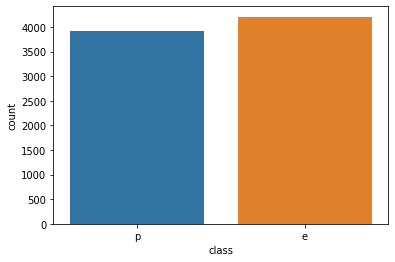

In [47]:
sns.countplot(x="class", data=ml_df)
plt.show()
# code reference kaggle.com 
# univariate model for the target
# easy to read and understand our target ratio

In [48]:
# Lets the categorical data to numbers to make them easier to read
# code reference kaggle.com
not_change = ["class"]
change_cols = list(set(ml_df.columns) - set(not_change))

ml_df = pd.get_dummies(ml_df, columns=change_cols)

ml_df.tail()

,class,veil-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,...,odor_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
8119,e,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8120,e,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8121,e,1,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
8122,p,1,0,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0,0,0,0
8123,e,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


So far I dont see any columns I want to delete yet. with futher exploration and testing down the line this could change

In [49]:
# Replacing values our target column to make out test train and split easier down the line
ml_df["class"] = ml_df["class"].replace("p", 1)
ml_df["class"] = ml_df["class"].replace("e", 0)

ml_df.head()
# code reference kaggle.com

,class,veil-type_p,spore-print-color_b,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,...,odor_y,veil-color_n,veil-color_o,veil-color_w,veil-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


Poisonus = 1 
Edible = 0

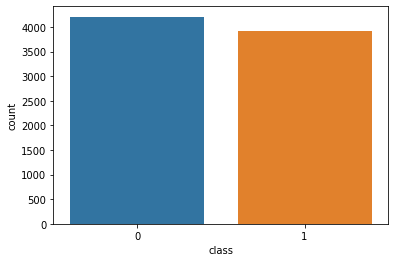

In [50]:
sns.countplot(x="class", data=ml_df)
plt.show()
# this will be ready for our test train and split for classifcation of eddible or poisonous at a later time